<a href="https://colab.research.google.com/github/dlsun/Stat350-S20/blob/master/colabs/Why_Study_Probability%3F_For_Electrical_Engineers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This is a code cell.
# To run the code in this cell, click on it and press the "Play" button.
!pip install -q symbulate
from symbulate import *
import matplotlib.pyplot as plt
from IPython.display import Audio

# This cell is not very exciting; it just loads libraries

     |████████████████████████████████| 51kB 1.5MB/s 


# Noise Processes

A good deal of effort in signal processing is devoted to analyzing and removing noise. Noise processes are random signals. In order to describe them, you will need to learn the language of randomness: probability.

Run the cell below. The code below simulates a type of noise process called a "moving average process". It generates an audio file and a plot of the signal. 

Don't worry about understanding the code. Just look at the plot and listen to the audio. Run the cell several times, to get a feel for how the audio and plot changes. (Each time you run the cell, a new noise signal is randomly generated.)

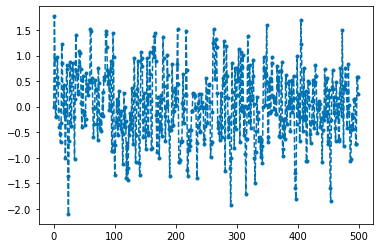

In [14]:
# Define white noise process.
P = Normal(0, 1) ** inf
W = RV(P)

# Define moving average process.
X = RandomProcess(P)
X[0] = 0
for n in range(1, 4000):
  X[n] = 0.5 * W[n] + 0.5 * W[n - 1]

# Simulate one noise signal.
x = X.draw()
x.plot(tmin=0, tmax=500)
Audio(x[:4000], rate=8000)

If you ran the above cell several times, you should have noticed that the audio always sounded more or less the same, even though the plot of the signal changed every time. That is because there is a lot of useless information in noise signals. Probability provides the tools to expose the bare esssentials hidden underneath noise signals.

In case you are thinking that all noise signals sound alike, here is a counterexample. I only changed one character from the code above. (Can you figure out what I changed?) Yet this signal sounds nothing like the one above.

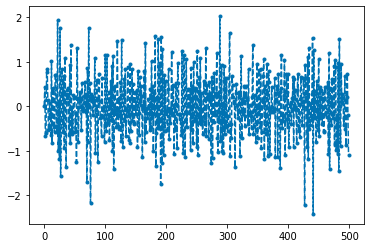

In [10]:
# Define white noise process.
P = Normal(0, 1) ** inf
W = RV(P)

# Define moving average process.
X = RandomProcess(P)
X[0] = 0
for n in range(1, 4000):
  X[n] = 0.5 * W[n] - 0.5 * W[n - 1]

# Simulate one noise signal.
x = X.draw()
x.plot(tmin=0, tmax=500)
Audio(x[:4000], rate=8000)

# Where We Are Headed

The first random process had more low-frequency content, while the second one had more high-frequency content. To distinguish between the two processes, we will compare their **power spectral densities**. 

The power spectral density captures substantitive differences between noise signals, without capturing any of the random fluctuations. As we have seen, random fluctuations are common with noise processes and can  dominate the analysis if we are not careful.

In the last week of class, we will learn an amazing result called the **Wiener-Khinchin Theorem**, which provides a way to calculate the power spectral density. It says: 

> The power spectral density of a stationary random process 
> the Fourier transform of the autocovariance function.

Of course, most of that sentence (except for "Fourier transform") is gobbledygook to you right now. There is a lot of probability to learn before we can even parse the above sentence. Let's get started!